In [212]:
#---------Authors---------
#t.acosta
#da.rubioh
#d.alvarezp
#---------------------

# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

from scipy import stats
##Import pipeline
from joblib import dump, load

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Entendimiento Datos

In [92]:
# Se cargan los datos. 

test=pd.read_csv('laptop_data_test_unlabeled.csv')
train=pd.read_csv('laptop_data_train.csv')
print(train.shape)
print(test.shape)
train

(1216, 14)
(64, 14)


id Company            TypeName  Ram  Weight      Price  TouchScreen  \
0      704  Lenovo            Notebook    4    1.90  10.084809            0   
1      712    Dell            Notebook    8    1.98  10.563111            0   
2     1072      HP           Ultrabook    8    1.26  11.064804            0   
3      370    Asus  2 in 1 Convertible   12    2.26  10.977717            1   
4      207    Dell           Ultrabook    8    1.21  11.550633            1   
...    ...     ...                 ...  ...     ...        ...          ...   
1211  1039      HP            Notebook    8    1.64  10.893771            0   
1212  1090    Dell            Notebook    4    2.20   9.950617            0   
1213  1125  Lenovo  2 in 1 Convertible    8    1.80  11.395541            1   
1214   856    Asus            Notebook    4    2.00  10.082584            0   
1215  1121      HP            Notebook    8    1.16  11.408045            0   

      Ips         Ppi              Cpu_brand     HDD  SSD Gpu_brand       Os  
0       0  100.454670          Intel Core i3   500.0    0     Intel   Others  
1       0  141.211998          Intel Core i5  1000.0    0     Intel   Others  
2       0  176.232574          Intel Core i5     0.0  256     Intel  Windows  
3       0  141.211998          Intel Core i7  2000.0  512    Nvidia  Windows  
4       1  331.264236          Intel Core i7     0.0  256     Intel  Windows  
...   ...         ...                    ...     ...  ...       ...      ...  
1211    0  157.350512          Intel Core i5     0.0  256     Intel  Windows  
1212    0  100.454670  Other Intel Processor   500.0    0     Intel   Others  
1213    1  157.350512          Intel Core i7     0.0  256     Intel  Windows  
1214    0  100.454670  Other Intel Processor  1000.0    0     Intel  Windows  
1215    0  165.632118          Intel Core i5     0.0  256     Intel  Windows  

[1216 rows x 14 columns]

In [93]:
train.shape

(1216, 14)

Por lo que podemos observar de los datos, todos son relevantes a primera vista, sin embargo, hay algunos valores inconsistentes y anomalos. Ademas, el id no se va a tomar debido a que ya se sabe que es un identificador que no aporta informacion

# Preparacion Datos

In [94]:
numerical = train.select_dtypes(include=np.number).columns.tolist()
numerical.remove("id")
numerical

['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']

In [95]:
categoricas = train.select_dtypes(exclude = np.number).columns.tolist()
categoricas

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

In [96]:
train = train.dropna()

In [97]:
train.shape

(1170, 14)

In [98]:
duplicated_rows = train.loc[train.duplicated(subset=train.columns, keep=False)].shape[0]
duplicated_rows

7

In [99]:
print(f"Duplicates: {(duplicated_rows/train.shape[0])*100:.4f}%")

Duplicates: 0.5983%


In [100]:
train.loc[train.duplicated(subset=train.columns, keep=False)].tail(4)

id Company            TypeName  Ram  Weight      Price  TouchScreen  \
658   182  Lenovo  2 in 1 Convertible   16    1.40  11.497961            1   
775    12   Apple           Ultrabook   16    1.83  11.775302            0   
798   182  Lenovo  2 in 1 Convertible   16    1.40  11.497961            1   
1096  645  Lenovo            Notebook    4    1.43   9.588689            0   

      Ips         Ppi              Cpu_brand  HDD  SSD Gpu_brand       Os  
658     1  316.965060          Intel Core i7  0.0  512     Intel  Windows  
775     1  220.534624          Intel Core i7  0.0  256       AMD      Mac  
798     1  316.965060          Intel Core i7  0.0  512     Intel  Windows  
1096    0  111.935204  Other Intel Processor  0.0    0     Intel  Windows

In [101]:
train.drop_duplicates(subset=train.columns.drop("Price"), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_11672\1108383170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop_duplicates(subset=train.columns.drop("Price"), inplace=True)


In [102]:
train.shape

(1166, 14)

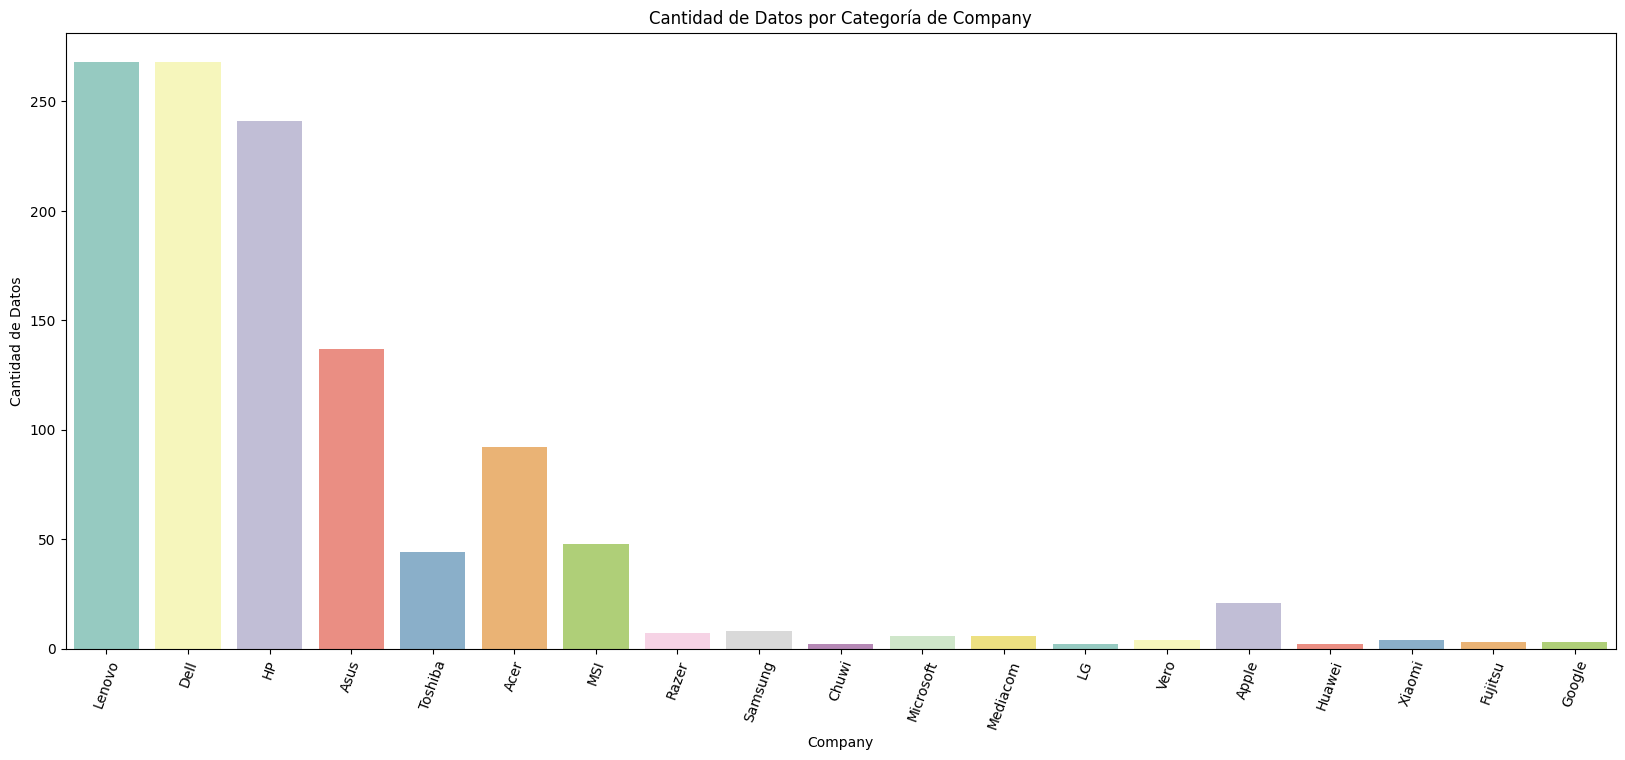

In [103]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Company", data=train, palette="Set3")

# Rotar las etiquetas del eje x para una mejor visualización
d = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Título y etiquetas de ejes
plt.title('Cantidad de Datos por Categoría de Company')
plt.xlabel('Company')
plt.ylabel('Cantidad de Datos')

plt.show()

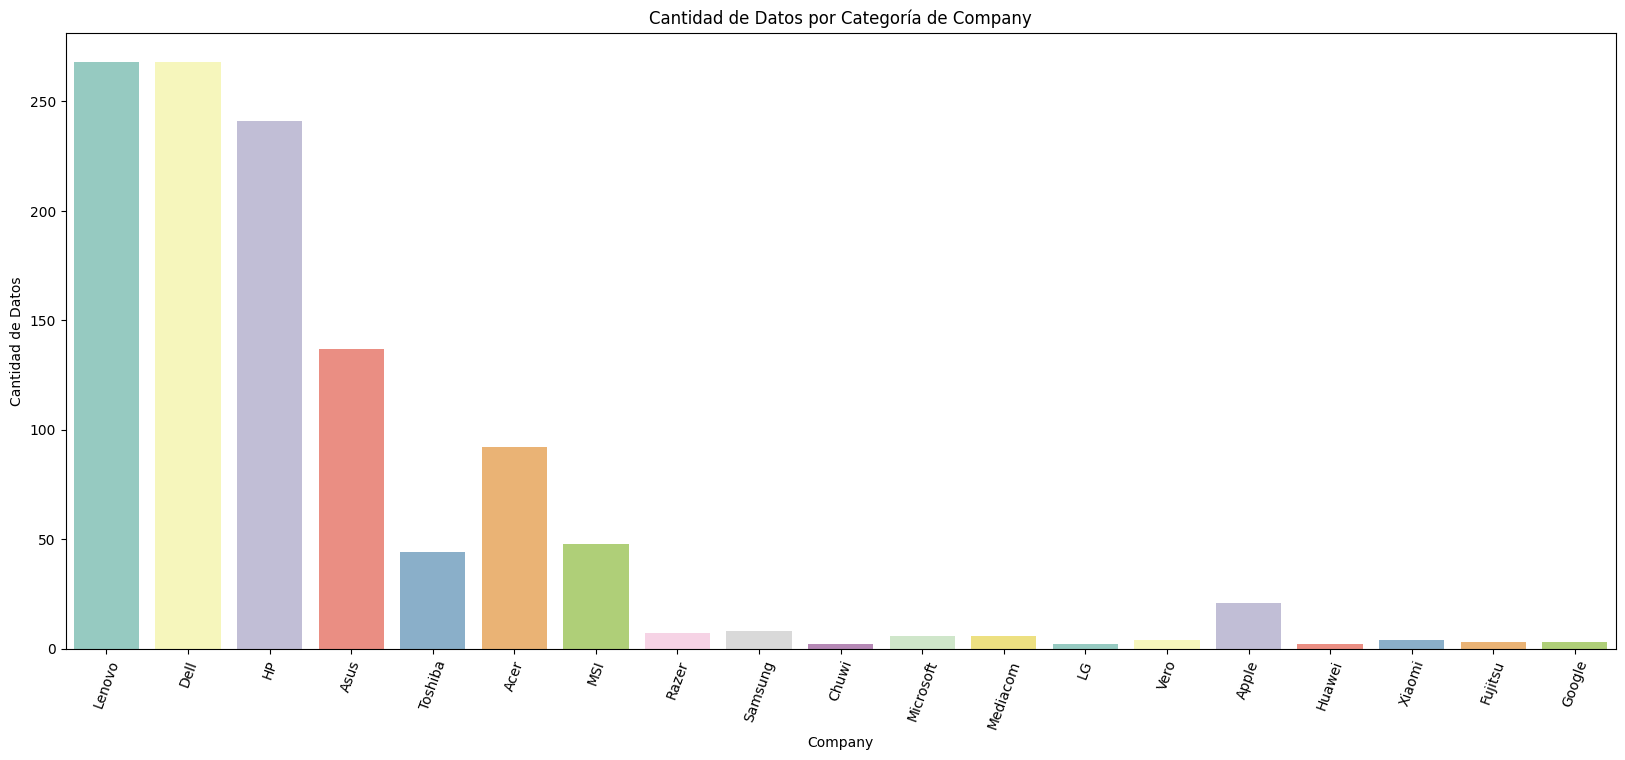

In [104]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Company", data=train, palette="Set3")

# Rotar las etiquetas del eje x para una mejor visualización
d = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Título y etiquetas de ejes
plt.title('Cantidad de Datos por Categoría de Company')
plt.xlabel('Company')
plt.ylabel('Cantidad de Datos')

plt.show()

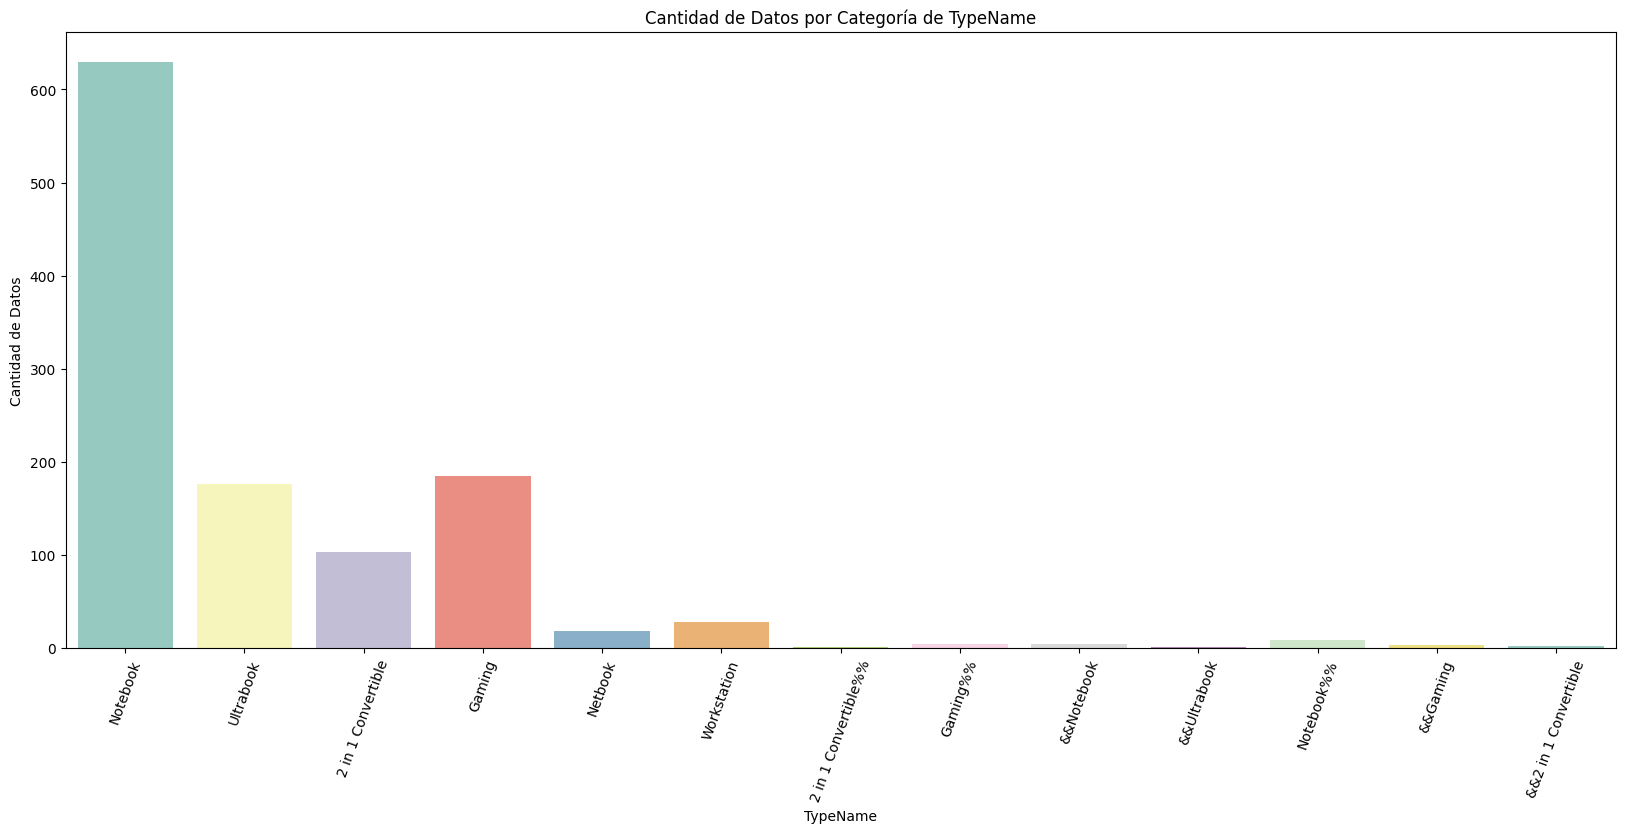

In [105]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="TypeName", data=train, palette="Set3")

# Rotar las etiquetas del eje x para una mejor visualización
d = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Título y etiquetas de ejes
plt.title('Cantidad de Datos por Categoría de TypeName')
plt.xlabel('TypeName')
plt.ylabel('Cantidad de Datos')

plt.show()

se decide eliminar aquellas categorias que no estan en el diccionario

In [106]:
train.drop(train[train['TypeName'].str.contains('&&2 in 1 Convertible')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('Notebook%%')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('&&Notebook')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('&&Ultrabook')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('Gaming%%')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('&&Gaming')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('2 in 1 Convertible%%')].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11672\1761712176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['TypeName'].str.contains('&&2 in 1 Convertible')].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11672\1761712176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['TypeName'].str.contains('Notebook%%')].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11672\1761712176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

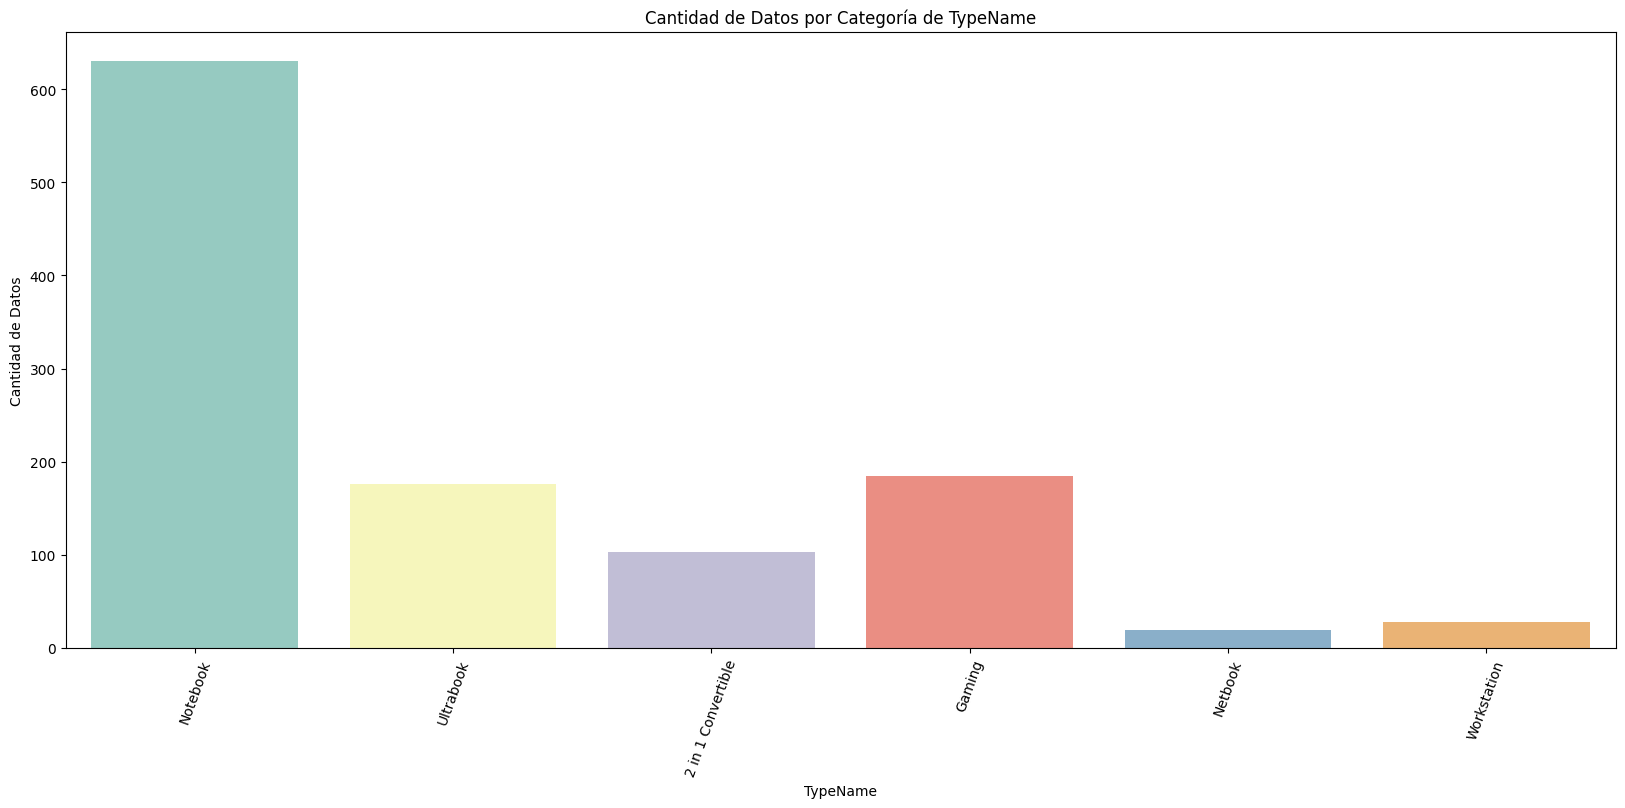

In [107]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="TypeName", data=train, palette="Set3")

# Rotar las etiquetas del eje x para una mejor visualización
d = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Título y etiquetas de ejes
plt.title('Cantidad de Datos por Categoría de TypeName')
plt.xlabel('TypeName')
plt.ylabel('Cantidad de Datos')

plt.show()

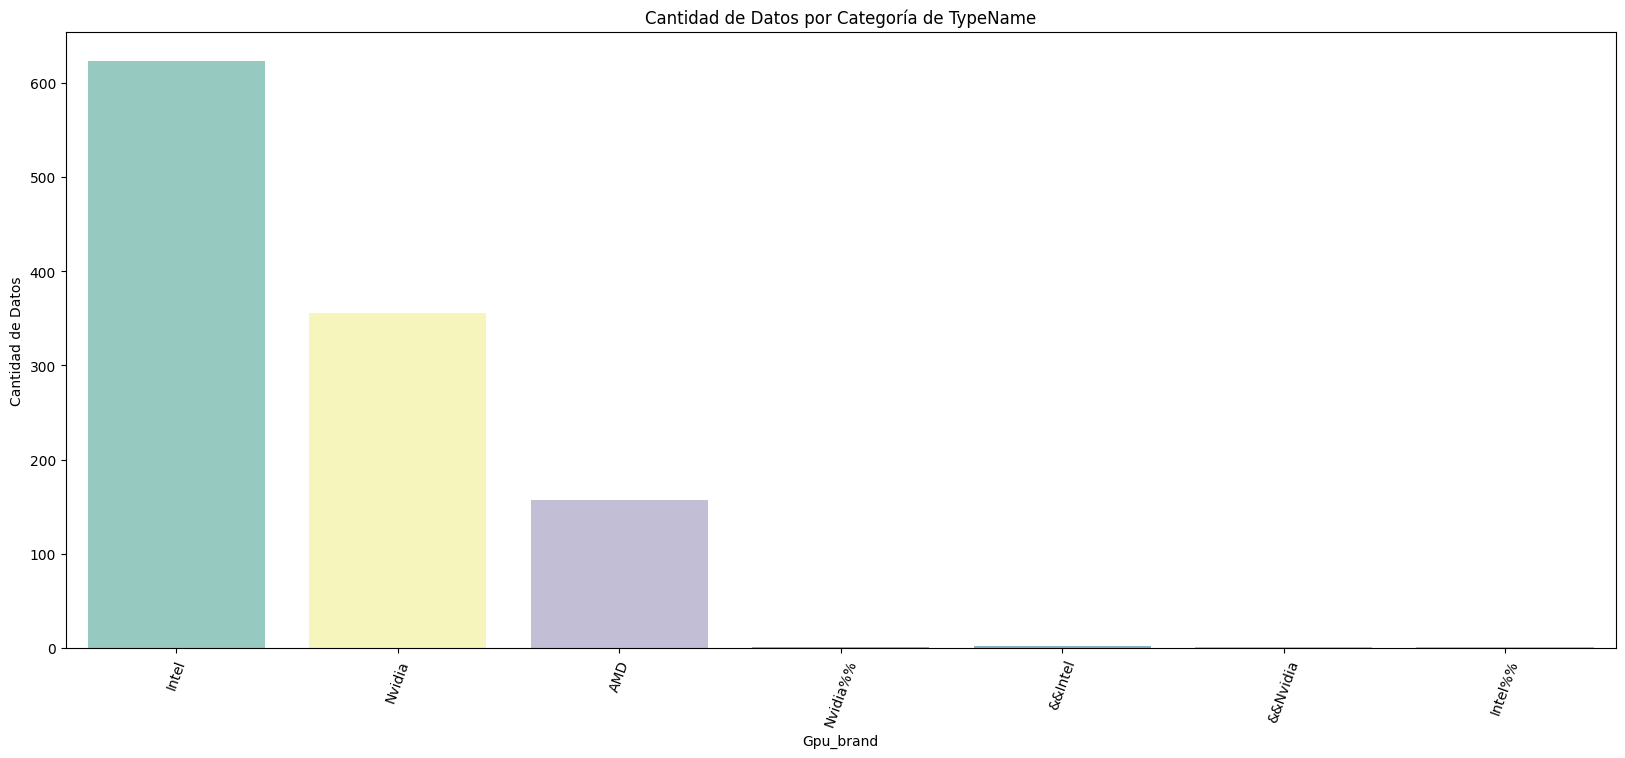

In [108]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Gpu_brand", data=train, palette="Set3")

# Rotar las etiquetas del eje x para una mejor visualización
d = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Título y etiquetas de ejes
plt.title('Cantidad de Datos por Categoría de TypeName')
plt.xlabel('Gpu_brand')
plt.ylabel('Cantidad de Datos')

plt.show()

Se decide eliminar categorias que no estan en  el diccionario

In [109]:

train.drop(train[train['Gpu_brand'].str.contains('Nvidia%%')].index, inplace=True)
train.drop(train[train['Gpu_brand'].str.contains('Intel%%')].index, inplace=True)
train.drop(train[train['Gpu_brand'].str.contains('&&Intel')].index, inplace=True)
train.drop(train[train['Gpu_brand'].str.contains('&&Nvidia')].index, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_11672\1458489383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Gpu_brand'].str.contains('Nvidia%%')].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11672\1458489383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Gpu_brand'].str.contains('Intel%%')].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11672\1458489383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

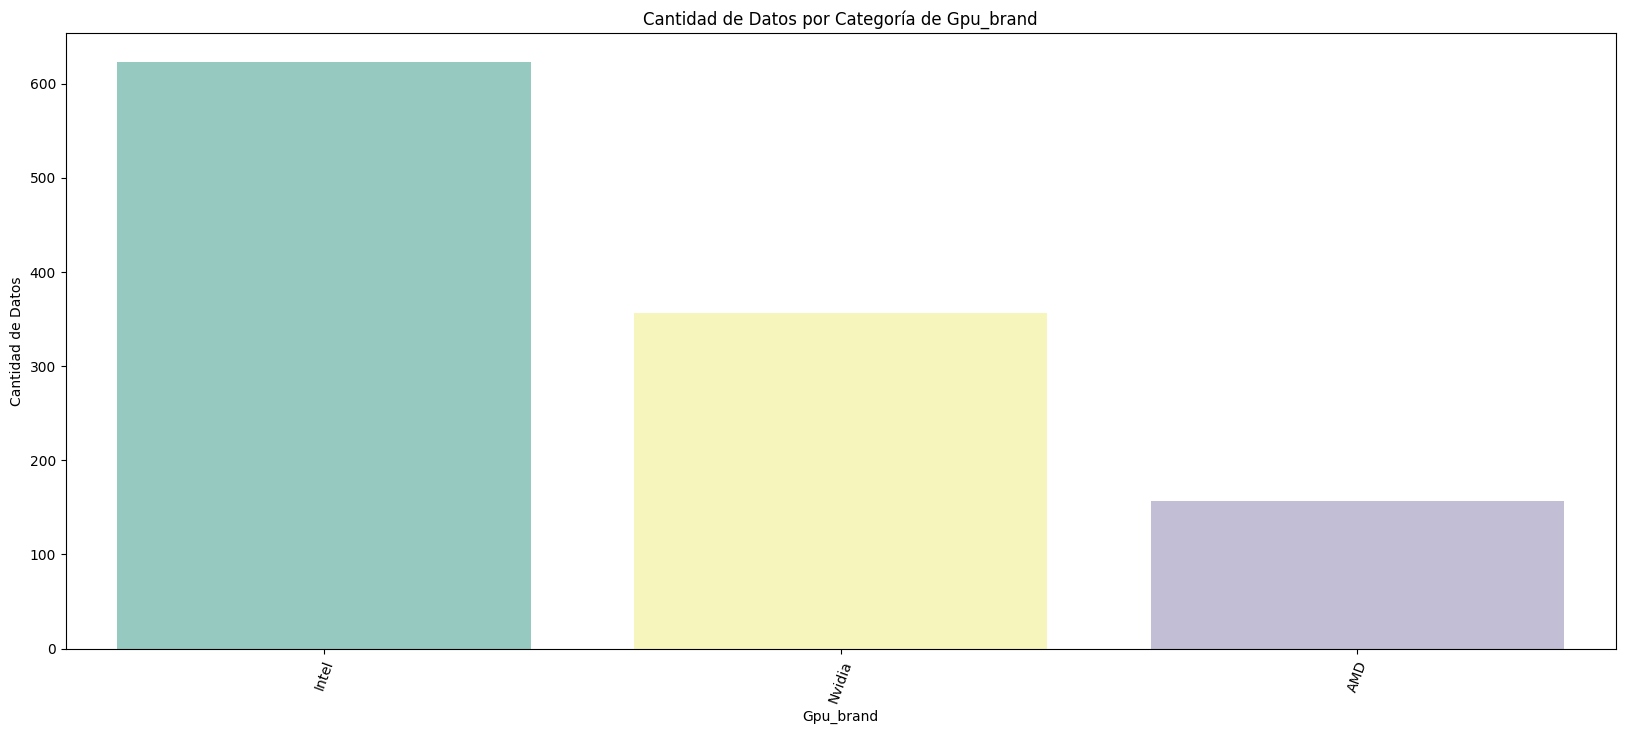

In [110]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Gpu_brand", data=train, palette="Set3")

# Rotar las etiquetas del eje x para una mejor visualización
d = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Título y etiquetas de ejes
plt.title('Cantidad de Datos por Categoría de Gpu_brand')
plt.xlabel('Gpu_brand')
plt.ylabel('Cantidad de Datos')

plt.show()

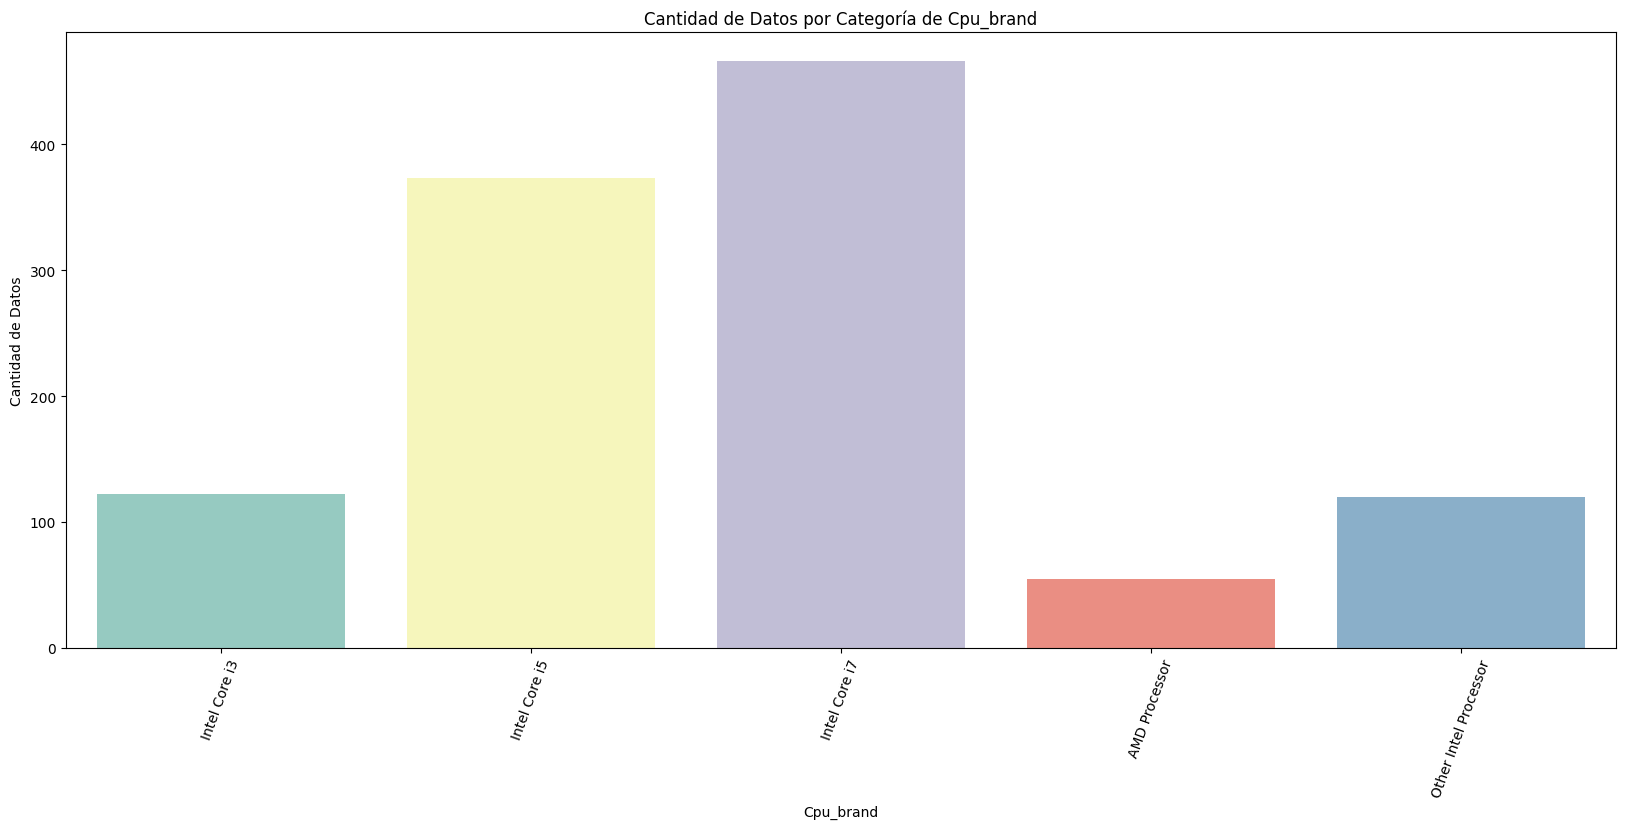

In [111]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Cpu_brand", data=train, palette="Set3")

# Rotar las etiquetas del eje x para una mejor visualización
d = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Título y etiquetas de ejes
plt.title('Cantidad de Datos por Categoría de Cpu_brand')
plt.xlabel('Cpu_brand')
plt.ylabel('Cantidad de Datos')

plt.show()

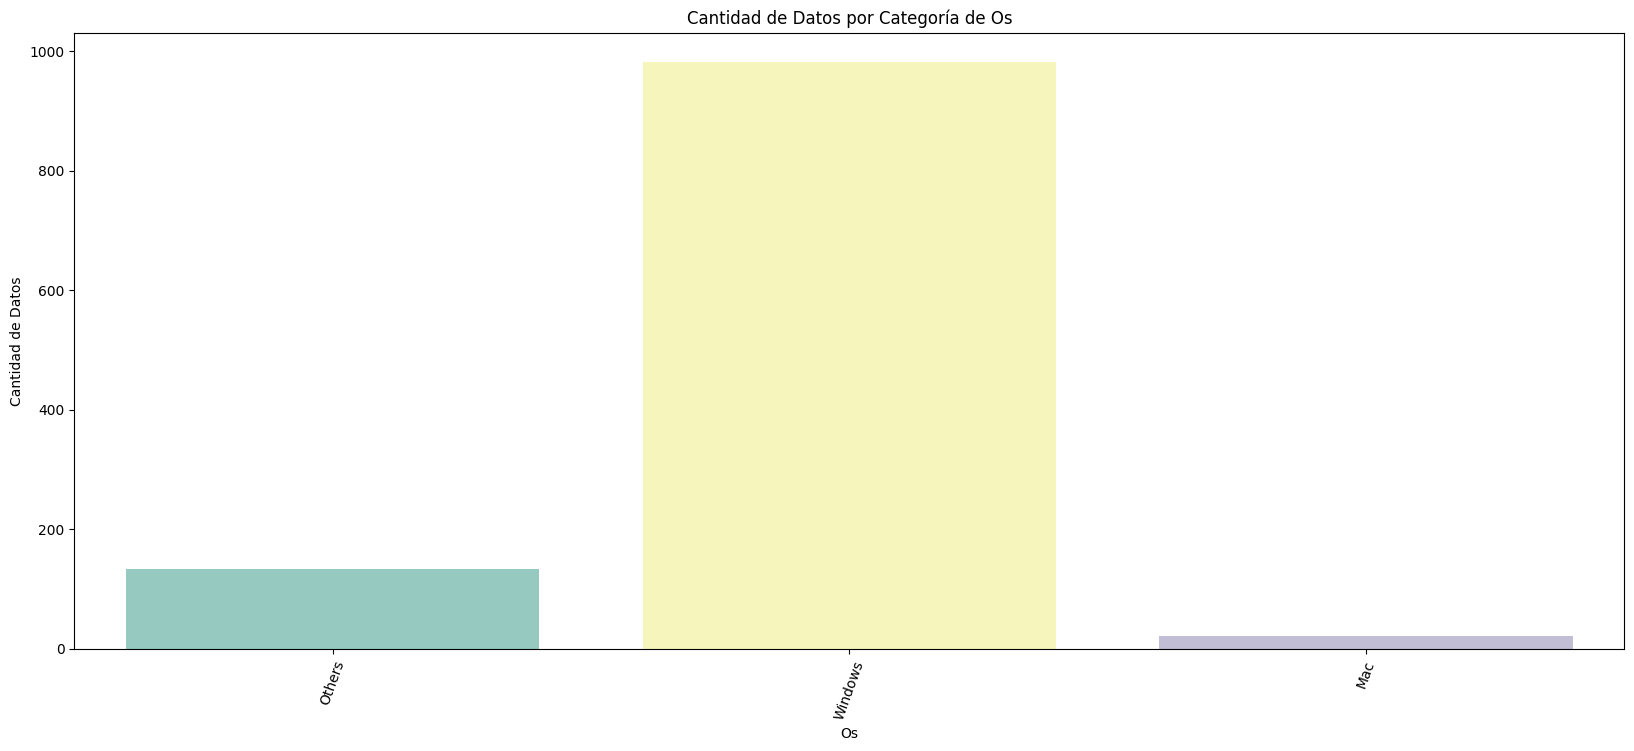

In [112]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Os", data=train, palette="Set3")

# Rotar las etiquetas del eje x para una mejor visualización
d = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Título y etiquetas de ejes
plt.title('Cantidad de Datos por Categoría de Os')
plt.xlabel('Os')
plt.ylabel('Cantidad de Datos')

plt.show()

Se decide agregar a Others el nivel MAC del factor Os por falta de datos

In [113]:
train['Os'] = train['Os'].replace(['Others','Mac'], 'Others')

C:\Users\user\AppData\Local\Temp\ipykernel_11672\3956846121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Os'] = train['Os'].replace(['Others','Mac'], 'Others')


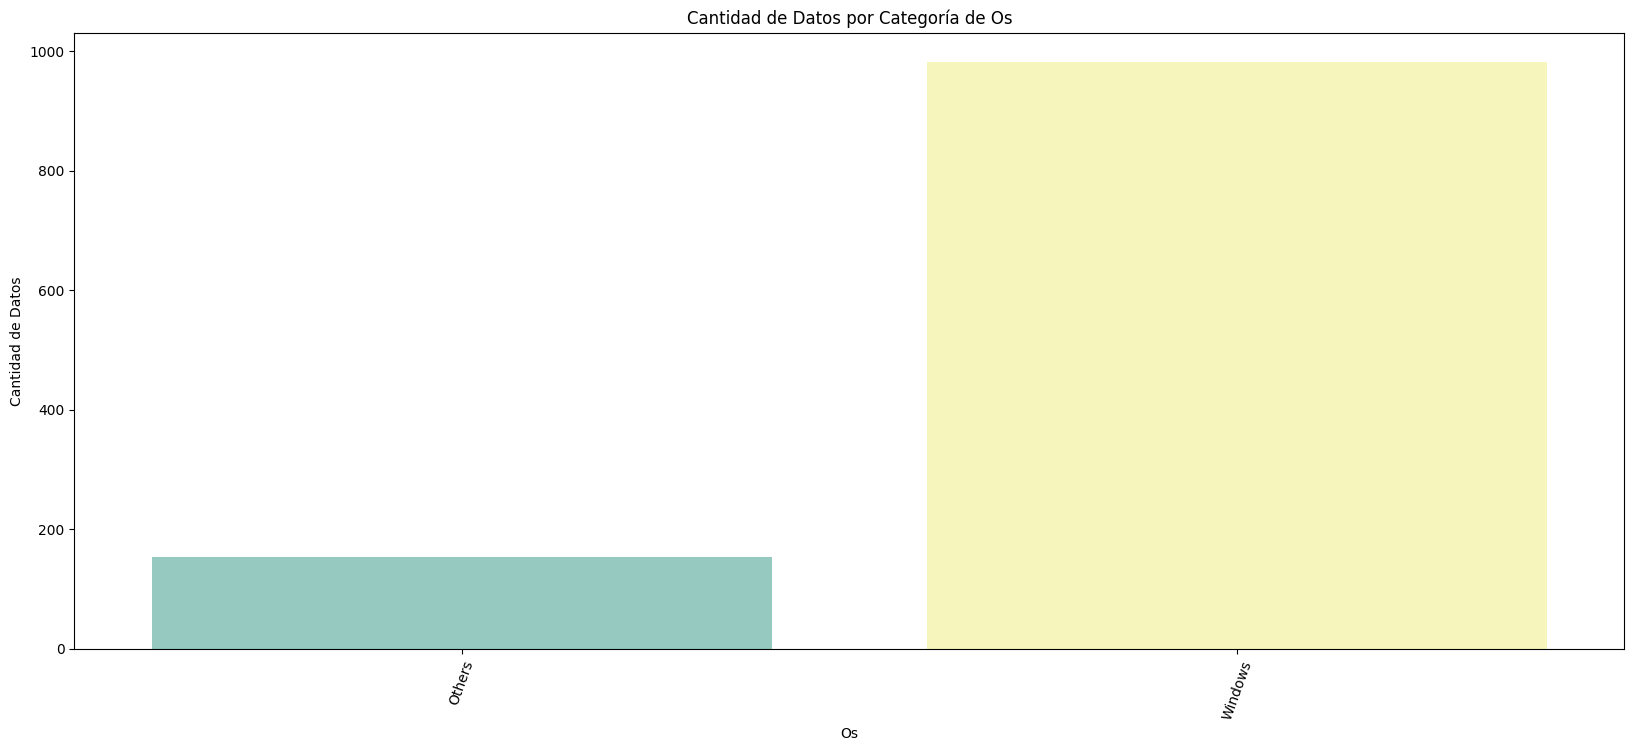

In [114]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="Os", data=train, palette="Set3")

# Rotar las etiquetas del eje x para una mejor visualización
d = ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Título y etiquetas de ejes
plt.title('Cantidad de Datos por Categoría de Os')
plt.xlabel('Os')
plt.ylabel('Cantidad de Datos')

plt.show()

In [115]:
train[numerical].describe()

Ram       Weight        Price  TouchScreen          Ips  \
count  1136.000000  1136.000000  1136.000000  1136.000000  1136.000000   
mean      8.503521     2.130150    12.425767     0.142606     0.284331   
std       5.112995     2.915884    24.796636     0.349824     0.451294   
min       2.000000     0.690000     9.134616     0.000000     0.000000   
25%       4.000000     1.500000    10.401118     0.000000     0.000000   
50%       8.000000     2.040000    10.882316     0.000000     0.000000   
75%       8.000000     2.310000    11.288115     0.000000     1.000000   
max      64.000000    97.729949   499.766079     1.000000     1.000000   

               Ppi          HDD          SSD  
count  1136.000000  1136.000000  1136.000000  
mean    152.213955   411.232394   189.545775  
std     183.794234   518.729456   187.308216  
min      90.583402     0.000000     0.000000  
25%     127.335675     0.000000     0.000000  
50%     141.211998     0.000000   256.000000  
75%     157.350512  1000.000000   256.000000  
max    6170.032609  2000.000000  1024.000000

In [116]:
profiling = pandas_profiling.ProfileReport(train[numerical])
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Ram

In [117]:
train["Ram"].describe()

count    1136.000000
mean        8.503521
std         5.112995
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

No nos influye en el precio el valor maximo y por tanto lo eliminamos

Text(0, 0.5, 'Price')

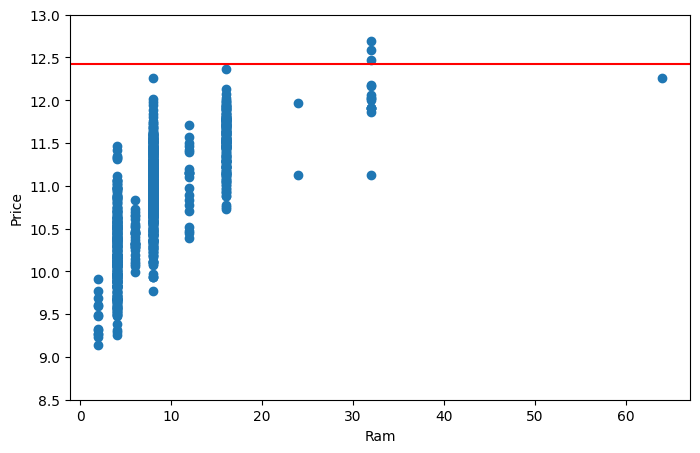

In [118]:
plt.figure(figsize=(8, 5))
plt.scatter(train['Ram'], train['Price'])
plt.axhline(y = train['Price'].mean(), label="Promedio", c='r')
plt.ylim(8.5, 13)
plt.xlabel('Ram')
plt.ylabel('Price')

In [119]:
train.drop(train[train['Ram'] > 60].index, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_11672\2738069791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Ram'] > 60].index, inplace=True)


In [120]:
train["Ram"].describe()

count    1135.000000
mean        8.454626
std         4.842257
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        32.000000
Name: Ram, dtype: float64

# Weight

In [121]:
train["Weight"].describe()

count    1135.000000
mean        2.128872
std         2.916851
min         0.690000
25%         1.500000
50%         2.040000
75%         2.310000
max        97.729949
Name: Weight, dtype: float64

Text(0, 0.5, 'Price')

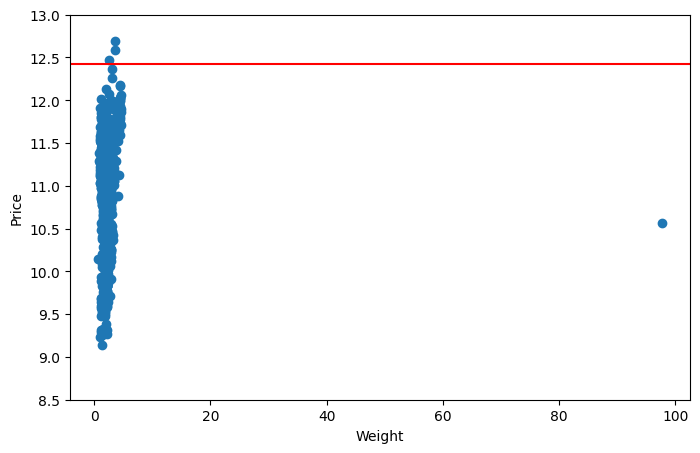

In [122]:
plt.figure(figsize=(8, 5))
plt.scatter(train['Weight'], train['Price'])
plt.axhline(y = train['Price'].mean(), label="Promedio", c='r')
plt.ylim(8.5, 13)
plt.xlabel('Weight')
plt.ylabel('Price')

El peso de un computador no puede ser de 97Kg por lo tanto se eliminan aquellos que pesen mas de 10 por datos anormales

In [123]:
train.drop(train[train['Weight'] >10].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11672\1206852523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Weight'] >10].index, inplace=True)


In [124]:
train["Weight"].describe()

count    1134.000000
mean        2.044568
std         0.664621
min         0.690000
25%         1.500000
50%         2.040000
75%         2.310000
max         4.600000
Name: Weight, dtype: float64

# Ppi

In [125]:
train["Ppi"].describe()

count    1134.000000
mean      152.245596
std       183.954604
min        90.583402
25%       127.335675
50%       141.211998
75%       157.350512
max      6170.032609
Name: Ppi, dtype: float64

Text(0, 0.5, 'Price')

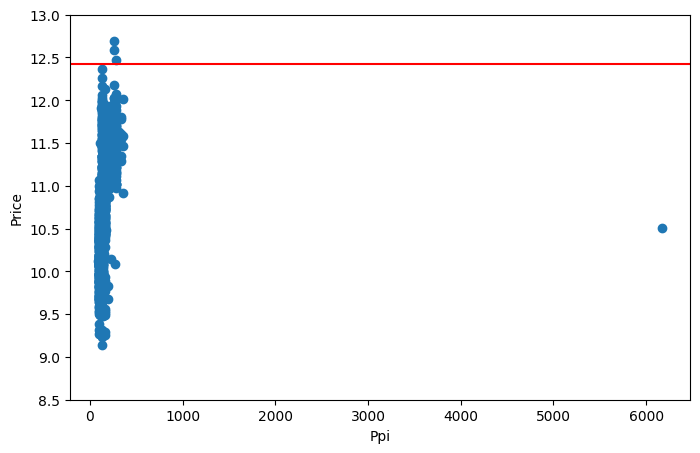

In [126]:
plt.figure(figsize=(8, 5))
plt.scatter(train['Ppi'], train['Price'])
plt.axhline(y = train['Price'].mean(), label="Promedio", c='r')
plt.ylim(8.5, 13)
plt.xlabel('Ppi')
plt.ylabel('Price')

El rango del Ppi normal es de 90 a 500 por lo tanto se eliminan valores fuera de este rango

In [127]:
train.drop(train[train['Ppi'] > 500].index, inplace=True)
train.drop(train[train['Ppi'] < 90].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11672\2507532863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Ppi'] > 500].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11672\2507532863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Ppi'] < 90].index, inplace=True)


In [128]:
train["Ppi"].describe()

count    1133.000000
mean      146.934221
std        43.011620
min        90.583402
25%       127.335675
50%       141.211998
75%       157.350512
max       352.465147
Name: Ppi, dtype: float64

# SSD

In [129]:
train["SSD"].describe()

count    1133.000000
mean      188.939100
std       185.906149
min         0.000000
25%         0.000000
50%       256.000000
75%       256.000000
max      1024.000000
Name: SSD, dtype: float64

Text(0, 0.5, 'Price')

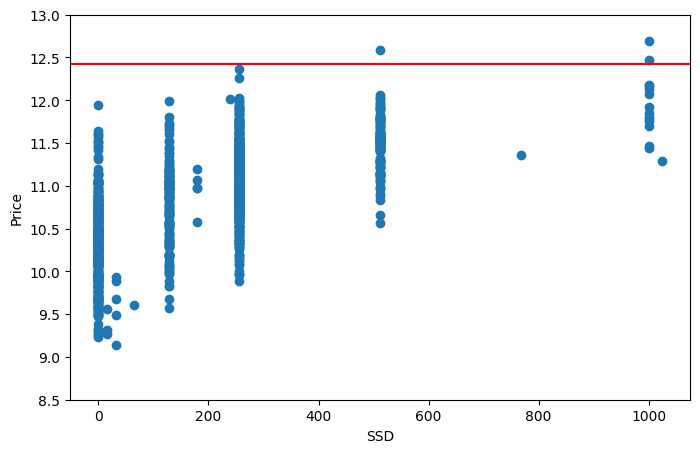

In [130]:
plt.figure(figsize=(8, 5))
plt.scatter(train['SSD'], train['Price'])
plt.axhline(y = train['Price'].mean(), label="Promedio", c='r')
plt.ylim(8.5, 13)
plt.xlabel('SSD')
plt.ylabel('Price')

In [131]:
numerical
profiling = pandas_profiling.ProfileReport(train[numerical])
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se encontraron valores en el precio que son demasiado altos y no tiene sentido, por lo tanto se eliminan

In [132]:
train[train['Price'] > 13]

id Company   TypeName  Ram  Weight       Price  TouchScreen  Ips  \
142    965    Dell   Notebook    4    2.25  302.137406            0    0   
545    385  Lenovo  Ultrabook    8    1.13  499.766079            0    1   
556   1229  Lenovo    Netbook   16    1.30  418.329347            1    1   
842    103      HP  Ultrabook    8    1.38  222.239809            0    1   
1114   197      HP   Notebook    8    1.49  417.859510            0    0   

             Ppi      Cpu_brand     HDD  SSD Gpu_brand       Os  
142   100.454670  Intel Core i3  1000.0    0       AMD   Others  
545   209.800683  Intel Core i7     0.0  512     Intel  Windows  
556   176.232574  Intel Core i7     0.0  512     Intel  Windows  
842   165.632118  Intel Core i7     0.0  256    Nvidia  Windows  
1114  165.632118  Intel Core i5     0.0  512     Intel  Windows

In [133]:
train.drop(train[train['Price'] > 13].index, inplace=True)
len(train[train['Price'] > 13])

C:\Users\user\AppData\Local\Temp\ipykernel_11672\3017226026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Price'] > 13].index, inplace=True)


0

In [134]:
train.select_dtypes(include=['int64']).dtypes

id             int64
Ram            int64
TouchScreen    int64
Ips            int64
SSD            int64
dtype: object

In [135]:
train[train.select_dtypes(include=['float64']).columns].describe()

Weight        Price          Ppi          HDD
count  1128.000000  1128.000000  1128.000000  1128.000000
mean      2.046933    10.835111   146.860568   412.819149
std       0.664929     0.617846    43.027850   519.396656
min       0.690000     9.134616    90.583402     0.000000
25%       1.500000    10.396776   127.335675     0.000000
50%       2.040000    10.882316   141.211998     0.000000
75%       2.310000    11.288115   157.350512  1000.000000
max       4.600000    12.691441   352.465147  2000.000000

Cambiar el valor de HDD a int ya que el diccionario lo dice

In [136]:
train['HDD'] = train['HDD'].astype('int64')

C:\Users\user\AppData\Local\Temp\ipykernel_11672\2118831433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['HDD'] = train['HDD'].astype('int64')


In [137]:
train.select_dtypes(include=['int64']).dtypes

id             int64
Ram            int64
TouchScreen    int64
Ips            int64
HDD            int64
SSD            int64
dtype: object

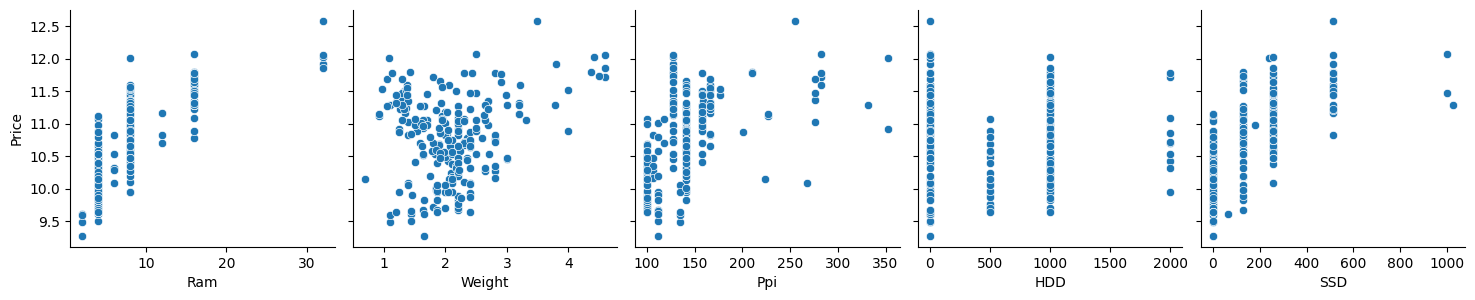

In [138]:
sns.pairplot(train.sample(frac=0.2), height=3, y_vars="Price", x_vars=train[["Ram", "Weight", "Ppi", "HDD", "SSD"]], kind="scatter")

In [139]:
numerical.remove("Price")

C:\Users\user\AppData\Local\Temp\ipykernel_11672\3916659774.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train[numerical+categoricas].corr(), cmap="Blues", vmin=0, vmax=1)


<Axes: >

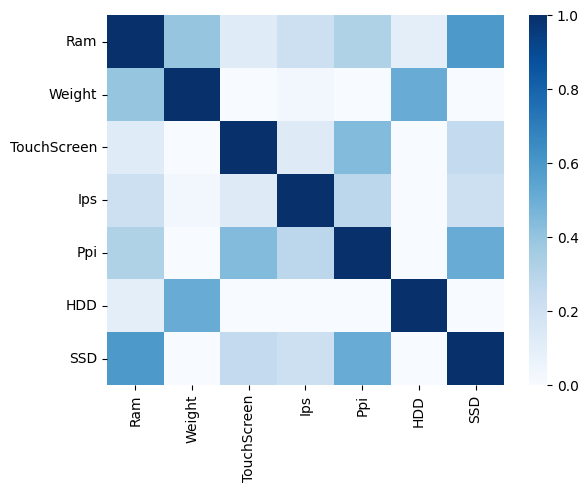

In [140]:
sns.heatmap(train[numerical+categoricas].corr(), cmap="Blues", vmin=0, vmax=1)

Se observa correlacion de Ram,SSD,PPi,Weight

In [141]:
train[numerical+categoricas].corr()

C:\Users\user\AppData\Local\Temp\ipykernel_11672\3209788025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train[numerical+categoricas].corr()


Ram    Weight  TouchScreen       Ips       Ppi       HDD  \
Ram          1.000000  0.394718     0.122557  0.211248  0.317264  0.100019   
Weight       0.394718  1.000000    -0.281404  0.034772 -0.310312  0.508643   
TouchScreen  0.122557 -0.281404     1.000000  0.126444  0.444431 -0.199972   
Ips          0.211248  0.034772     0.126444  1.000000  0.284084 -0.087804   
Ppi          0.317264 -0.310312     0.444431  0.284084  1.000000 -0.293886   
HDD          0.100019  0.508643    -0.199972 -0.087804 -0.293886  1.000000   
SSD          0.592275 -0.059784     0.253913  0.213719  0.510998 -0.400848   

                  SSD  
Ram          0.592275  
Weight      -0.059784  
TouchScreen  0.253913  
Ips          0.213719  
Ppi          0.510998  
HDD         -0.400848  
SSD          1.000000

Se decido eliminar Weight, SSD, PPi para disminuir la correlacion del modelo

In [142]:
numerical.remove("Weight")
numerical.remove("SSD")
numerical.remove("Ppi")

C:\Users\user\AppData\Local\Temp\ipykernel_11672\3916659774.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train[numerical+categoricas].corr(), cmap="Blues", vmin=0, vmax=1)


<Axes: >

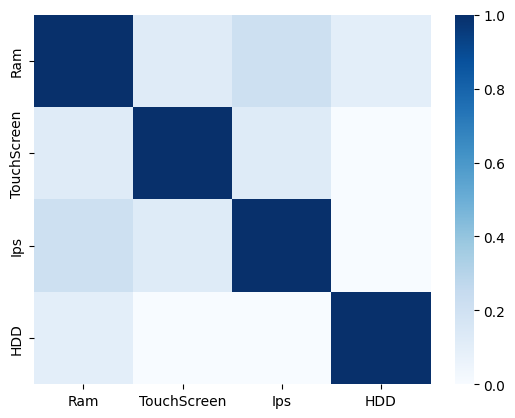

In [143]:
sns.heatmap(train[numerical+categoricas].corr(), cmap="Blues", vmin=0, vmax=1)

# Estadisticas de las descriptivas despues de la seleccion

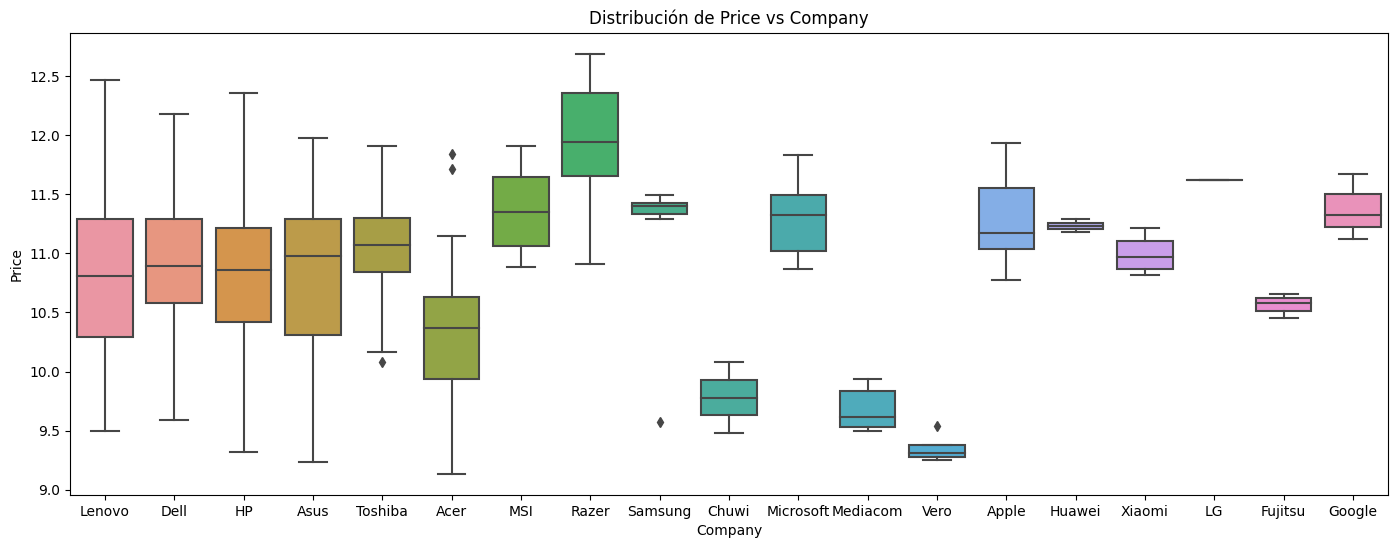

In [182]:
plt.figure(figsize=(17, 6))  # Ajusta el tamaño como desees (ancho, alto)

# Crea el gráfico de caja (boxplot)
sns.boxplot(x='Company', y='Price', data=train)
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Distribución de Price vs Company')

# Muestra el gráfico
plt.show()

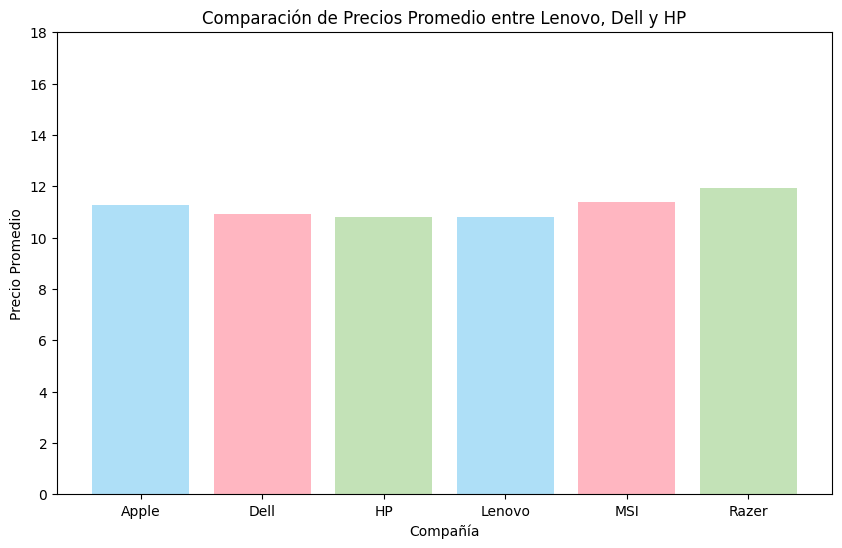

In [211]:

# Filtra el DataFrame para obtener solo las filas de las compañías Lenovo, Dell y HP
selected_companies = train[train['Company'].isin(['Lenovo', 'Dell', 'HP', 'Razer','Apple','MSI'])]

# Calcula las medias de precios para cada compañía
mean_prices = selected_companies.groupby('Company')['Price'].mean().reset_index()

# Crea un gráfico de barras para comparar las medias de precios
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.bar(mean_prices['Company'], mean_prices['Price'], color=['#AEDFF7', '#FFB6C1', '#C3E2B7'])
plt.xlabel('Compañía')
plt.ylabel('Precio Promedio')
plt.title('Comparación de Precios Promedio entre Lenovo, Dell y HP')
plt.ylim(0, 18)  # Ajusta el rango del eje y si es necesario
plt.show()

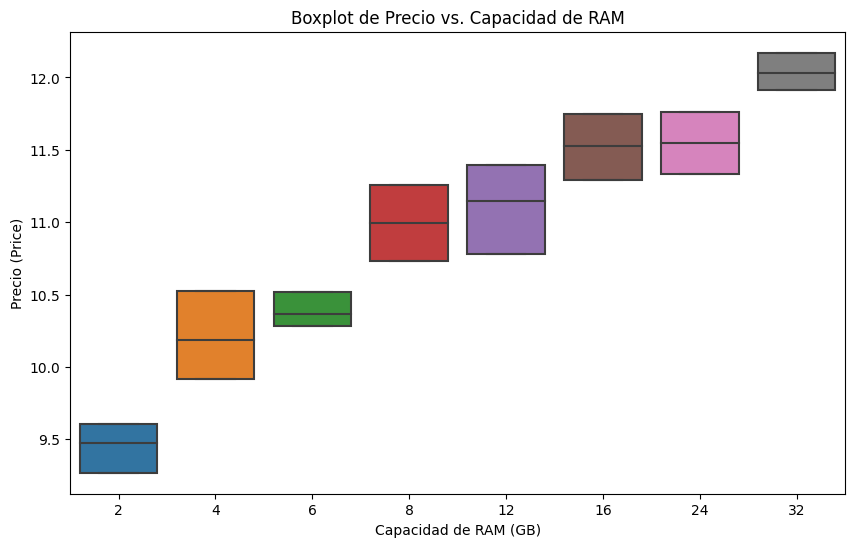

In [191]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.boxplot(x='Ram', y='Price', data=train, whis=[25, 75], showfliers=False)
plt.xlabel('Capacidad de RAM (GB)')
plt.ylabel('Precio (Price)')
plt.title('Boxplot de Precio vs. Capacidad de RAM')
plt.show()

Text(0.5, 1.0, 'Histograma de Precio vs. Capacidad de Disco Duro (HHD)')

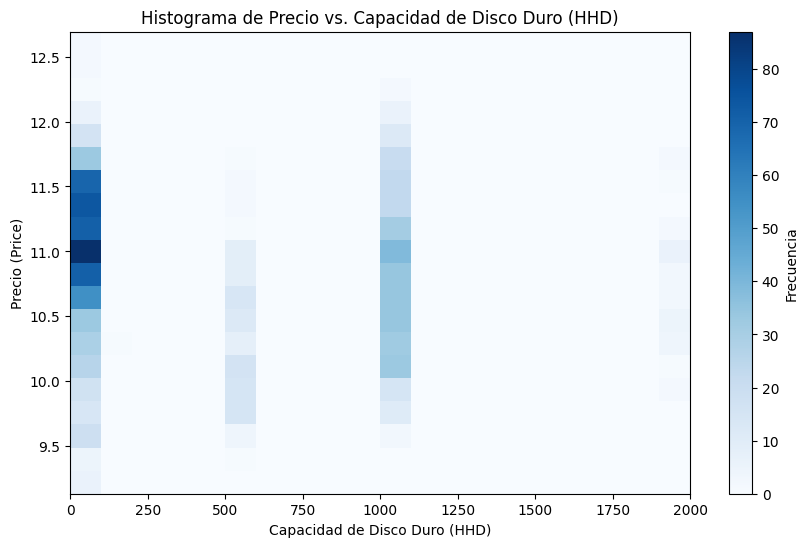

In [193]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.hist2d(train['HDD'], train['Price'], bins=(20, 20), cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.xlabel('Capacidad de Disco Duro (HDD)')
plt.ylabel('Precio (Price)')
plt.title('Histograma de Precio vs. Capacidad de Disco Duro (HDD)')

Text(0.5, 1.0, 'Histograma de Precio para Laptops de la Categoría "gaming"')

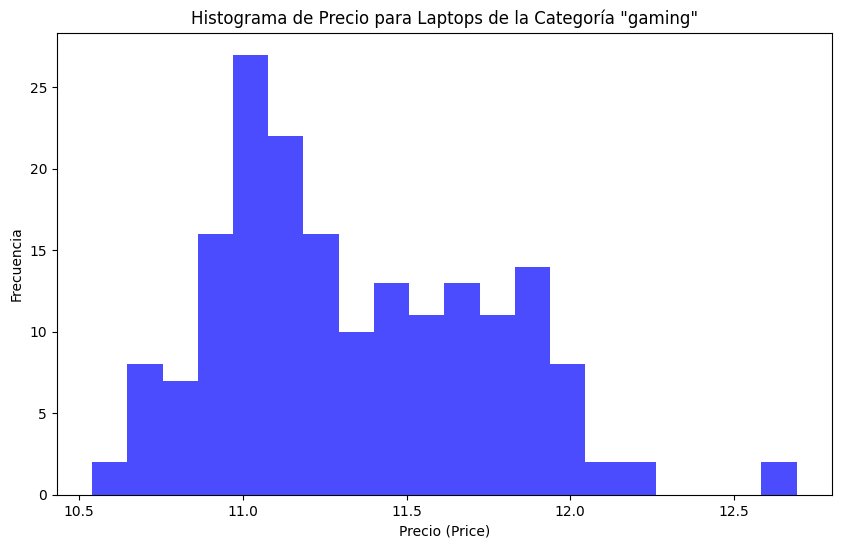

In [195]:
gaming_laptops = train[train['TypeName'] == 'Gaming']
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.hist(gaming_laptops['Price'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Precio (Price)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Laptops de la Categoría "gaming"')

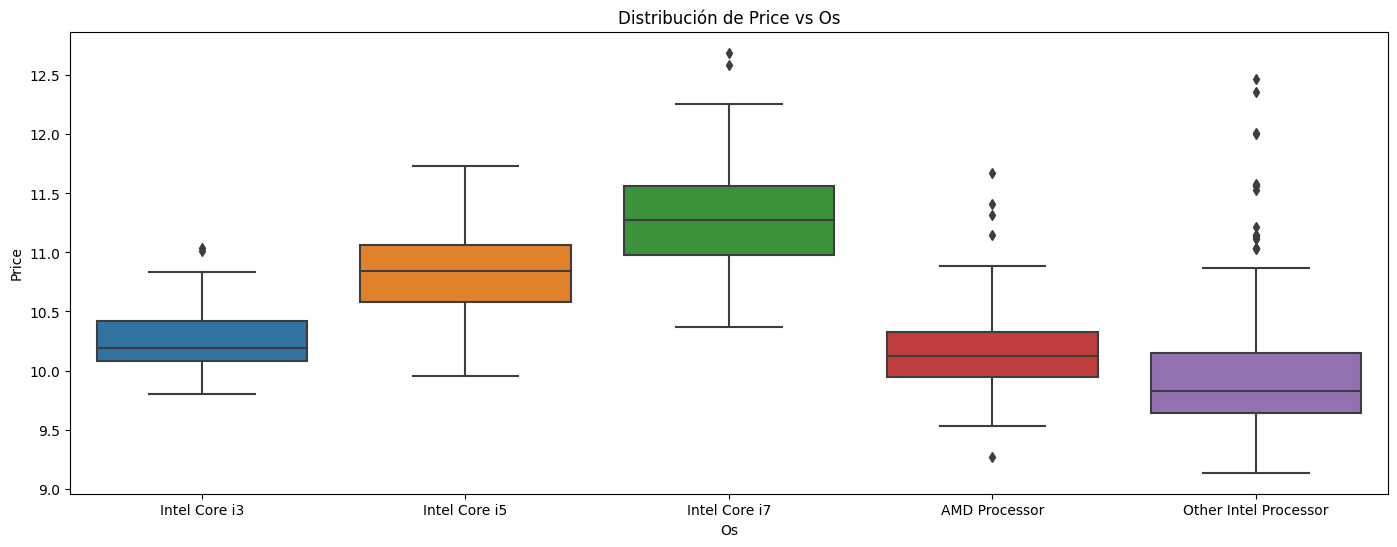

In [197]:
plt.figure(figsize=(17, 6))  # Ajusta el tamaño como desees (ancho, alto)

# Crea el gráfico de caja (boxplot)
sns.boxplot(x='Cpu_brand', y='Price', data=train)
plt.xlabel('Os')
plt.ylabel('Price')
plt.title('Distribución de Price vs Os')

# Muestra el gráfico
plt.show()

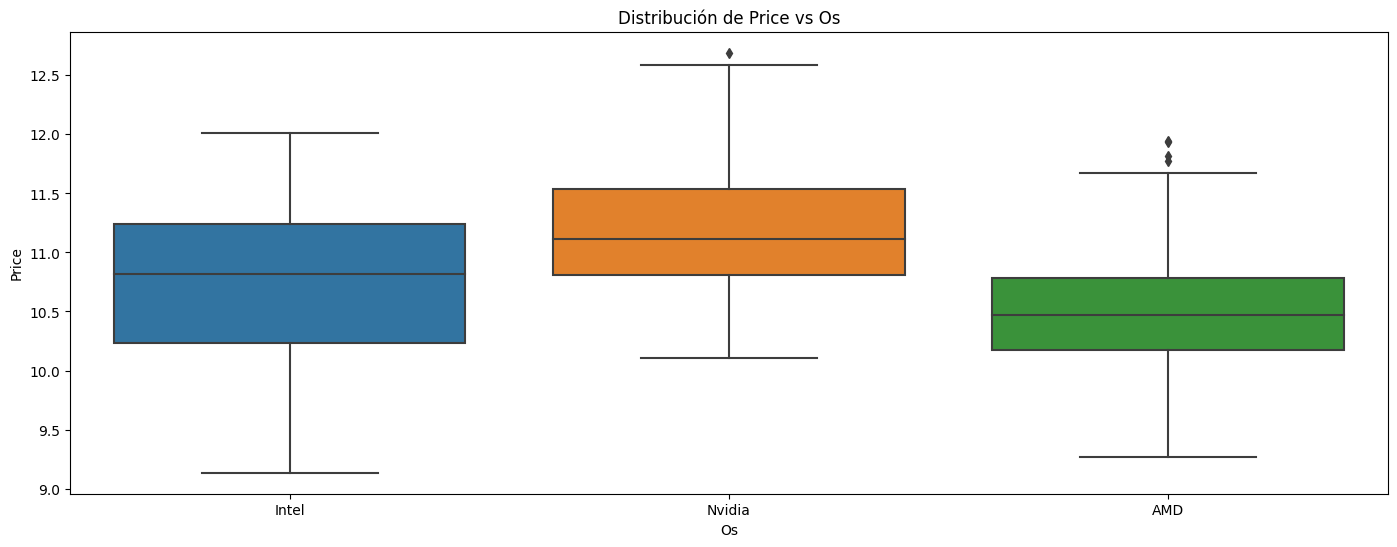

In [198]:
plt.figure(figsize=(17, 6))  # Ajusta el tamaño como desees (ancho, alto)

# Crea el gráfico de caja (boxplot)
sns.boxplot(x='Gpu_brand', y='Price', data=train)
plt.xlabel('Os')
plt.ylabel('Price')
plt.title('Distribución de Price vs Os')

# Muestra el gráfico
plt.show()

# Modelado

In [144]:
x = train[numerical + categoricas]
y = train["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
x_REAL_test = test[numerical+ categoricas]

In [145]:
x_train.shape, y_train.shape    

((846, 9), (846,))

In [146]:
x_test.shape, y_test.shape

((282, 9), (282,))

In [147]:


numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("encoder", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

preprocessing_pipeline = ColumnTransformer([
    ("numerical_preprocessor", numerical_pipeline, numerical),
    ("categorical_preprocessor", categorical_pipeline, categoricas)
])




In [148]:
preprocessing_pipeline

ColumnTransformer(transformers=[('numerical_preprocessor',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('encoder',
                                                  StandardScaler())]),
                                 ['Ram', 'TouchScreen', 'Ips', 'HDD']),
                                ('categorical_preprocessor',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=True))]),
                                 ['Company', 'TypeName', 'Cpu_brand',
                                  'Gpu_brand', 'Os'])])

In [149]:
#Todo en un pipeline

ML_model = LinearRegression()
complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", ML_model)
])

In [150]:
x_train_transformed= preprocessing_pipeline.fit_transform(x_train)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [151]:
complete_pipeline["estimator"].fit(x_train_transformed,y_train)

LinearRegression()

In [152]:
# Obtener los coeficientes del modelo
coef = complete_pipeline.named_steps['estimator'].coef_

coef

array([ 0.24298459, -0.00095697,  0.04049068, -0.06261285, -0.14717016,
        0.51003497, -0.01161058, -0.37097625,  0.05898972, -0.16216407,
        0.40910589,  0.09536422,  0.02592238,  0.00559355,  0.12337792,
       -0.43265468,  0.2822052 ,  0.23645244,  0.07269609,  0.0935013 ,
       -0.68404264, -0.1046253 ,  0.01571808, -0.00554364, -0.216164  ,
       -0.21058354,  0.04921674,  0.36735636, -0.12856057, -0.08792504,
        0.22100969,  0.3293879 , -0.33391199, -0.06121572,  0.02072666,
        0.04048906, -0.12931876,  0.12931876])

In [153]:
df = pd.DataFrame({"columnas": complete_pipeline["preprocessor"], "coef": complete_pipeline["estimator"].coef_})

In [154]:
df

columnas      coef
0   ColumnTransformer(transformers=[('numerical_pr...  0.242985
1   ColumnTransformer(transformers=[('numerical_pr... -0.000957
2   ColumnTransformer(transformers=[('numerical_pr...  0.040491
3   ColumnTransformer(transformers=[('numerical_pr... -0.062613
4   ColumnTransformer(transformers=[('numerical_pr... -0.147170
5   ColumnTransformer(transformers=[('numerical_pr...  0.510035
6   ColumnTransformer(transformers=[('numerical_pr... -0.011611
7   ColumnTransformer(transformers=[('numerical_pr... -0.370976
8   ColumnTransformer(transformers=[('numerical_pr...  0.058990
9   ColumnTransformer(transformers=[('numerical_pr... -0.162164
10  ColumnTransformer(transformers=[('numerical_pr...  0.409106
11  ColumnTransformer(transformers=[('numerical_pr...  0.095364
12  ColumnTransformer(transformers=[('numerical_pr...  0.025922
13  ColumnTransformer(transformers=[('numerical_pr...  0.005594
14  ColumnTransformer(transformers=[('numerical_pr...  0.123378
15  ColumnTransformer(transformers=[('numerical_pr... -0.432655
16  ColumnTransformer(transformers=[('numerical_pr...  0.282205
17  ColumnTransformer(transformers=[('numerical_pr...  0.236452
18  ColumnTransformer(transformers=[('numerical_pr...  0.072696
19  ColumnTransformer(transformers=[('numerical_pr...  0.093501
20  ColumnTransformer(transformers=[('numerical_pr... -0.684043
21  ColumnTransformer(transformers=[('numerical_pr... -0.104625
22  ColumnTransformer(transformers=[('numerical_pr...  0.015718
23  ColumnTransformer(transformers=[('numerical_pr... -0.005544
24  ColumnTransformer(transformers=[('numerical_pr... -0.216164
25  ColumnTransformer(transformers=[('numerical_pr... -0.210584
26  ColumnTransformer(transformers=[('numerical_pr...  0.049217
27  ColumnTransformer(transformers=[('numerical_pr...  0.367356
28  ColumnTransformer(transformers=[('numerical_pr... -0.128561
29  ColumnTransformer(transformers=[('numerical_pr... -0.087925
30  ColumnTransformer(transformers=[('numerical_pr...  0.221010
31  ColumnTransformer(transformers=[('numerical_pr...  0.329388
32  ColumnTransformer(transformers=[('numerical_pr... -0.333912
33  ColumnTransformer(transformers=[('numerical_pr... -0.061216
34  ColumnTransformer(transformers=[('numerical_pr...  0.020727
35  ColumnTransformer(transformers=[('numerical_pr...  0.040489
36  ColumnTransformer(transformers=[('numerical_pr... -0.129319
37  ColumnTransformer(transformers=[('numerical_pr...  0.129319

In [155]:
print("x_train:")
print(x_train.head())
print("y_train:")
print(y_train.head())

# Para los datos de prueba
print("x_test:")
print(x_test.head())
print("y_test:")
print(y_test.head())

x_train:
      Ram  TouchScreen  Ips   HDD Company   TypeName              Cpu_brand  \
32      4            0    0     0    Dell   Notebook          Intel Core i3   
394     8            0    1  1000    Acer     Gaming          Intel Core i7   
854     4            0    0  1000    Acer   Notebook  Other Intel Processor   
1125   12            0    0     0  Lenovo  Ultrabook          Intel Core i7   
274    16            0    0  1000     MSI     Gaming          Intel Core i7   

     Gpu_brand       Os  
32       Intel  Windows  
394     Nvidia  Windows  
854      Intel   Others  
1125     Intel  Windows  
274     Nvidia  Windows  
y_train:
32      10.510802
394     11.114428
854      9.672655
1125    11.715791
274     11.352695
Name: Price, dtype: float64
x_test:
      Ram  TouchScreen  Ips   HDD  Company   TypeName              Cpu_brand  \
944     4            0    0   500       HP   Notebook          AMD Processor   
456    16            0    0     0  Samsung  Ultrabook          In

In [156]:
complete_pipeline["estimator"].intercept_

10.645233733709066

In [157]:
y_train.mean(), y_test.mean()

(10.846227913219673, 10.801761308620783)

### Mejor modelo

In [158]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, complete_pipeline.predict(x_train)))
print("Test:", mean_absolute_error(y_test, complete_pipeline.predict(x_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, complete_pipeline.predict(x_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, complete_pipeline.predict(x_test))))

MAE:
Train: 0.21184828698152905
Test: 0.22556305450479675

RMSE:
Train: 0.2706138723198089
Test: 0.2927398083514718


In [159]:
# Calcula el coeficiente R^2 para los datos de prueba
r2_train = r2_score(y_train, complete_pipeline.predict(x_train))
r2_test = r2_score(y_test, complete_pipeline.predict(x_test))

print("\nCoeficiente R^2:")
print("Train:", r2_train)
print("Test:", r2_test)


Coeficiente R^2:
Train: 0.8108601702628634
Test: 0.7636270806277574


In [160]:
y_REAL_test = complete_pipeline.predict(x_REAL_test)

In [161]:
pred = pd.DataFrame(y_REAL_test)
sub_df = pd.read_csv("laptop_data_test_unlabeled.csv")
sub_df.columns

Index(['id', 'Company', 'TypeName', 'Ram', 'Weight', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os', 'CalculatedPrice'],
      dtype='object')

In [162]:
datasets = pd.concat([sub_df["id"],sub_df["Company"]
                      ,sub_df["TypeName"],sub_df["Ram"]
                      ,sub_df["Weight"],sub_df["TouchScreen"]
                      ,sub_df["Ips"],sub_df["Ppi"]
                      ,sub_df["Cpu_brand"],sub_df["HDD"]
                      , sub_df["SSD"],sub_df["Gpu_brand"]
                      ,sub_df["Os"],pred],axis=1)
datasets.columns = ["id","Company","TypeName","Ram","Weight","TouchScreen","Ips","Ppi","Cpu_brand","HDD","SSD","Gpu_brand","Os","CalculatedPrice"]
datasets.to_csv("Predicciones.csv", index=False)

### Predicciones

In [163]:
datasets.head(10)

id  Company  TypeName  Ram  Weight  TouchScreen  Ips         Ppi  \
0  1234       HP  Notebook    4    2.10            0    0  141.211998   
1   691   Lenovo  Notebook    4    1.70            0    0  157.350512   
2   894      MSI    Gaming   16    2.43            0    1  254.671349   
3   766     Asus  Notebook    4    2.80            0    0   90.583402   
4   739     Acer  Notebook    4    2.40            0    0  100.454670   
5   342       HP  Notebook    8    2.10            0    1  141.211998   
6   236     Acer  Notebook    4    2.10            0    0  100.454670   
7   460     Acer  Notebook    4    2.23            0    0  141.211998   
8   401     Asus    Gaming   16    2.90            0    0  127.335675   
9   981  Toshiba  Notebook    4    1.20            0    0  165.632118   

               Cpu_brand     HDD  SSD Gpu_brand       Os  CalculatedPrice  
0          Intel Core i3  1000.0    0     Intel  Windows        10.279308  
1          Intel Core i5     0.0  256     Intel  Windows        10.618613  
2          Intel Core i7  2000.0  512    Nvidia  Windows        11.491885  
3  Other Intel Processor  1000.0    0    Nvidia  Windows         9.946109  
4          Intel Core i3   500.0    0     Intel  Windows        10.096844  
5          Intel Core i3  1000.0    0    Nvidia  Windows        10.579740  
6          Intel Core i3  1000.0    0     Intel   Others         9.778136  
7          Intel Core i3  1000.0    0    Nvidia  Windows        10.056536  
8          Intel Core i7  1000.0  256    Nvidia  Windows        11.387327  
9          Intel Core i5     0.0  128     Intel  Windows        10.706521

In [164]:
filtered_data = datasets[datasets['Ppi'] > 7000]

# Obtener la columna "Price" correspondiente a las filas filtradas
prices_for_ppi_above_7000 = filtered_data['id']
prices_for_ppi_above_7000

datasets[datasets['Ppi'] > 7000]

id Company  TypeName  Ram  Weight  TouchScreen  Ips         Ppi  \
15  522    Dell  Notebook    8     NaN            0    0  7532.20559   

        Cpu_brand  HDD  SSD Gpu_brand       Os  CalculatedPrice  
15  Intel Core i5  0.0  256     Intel  Windows        10.862969

# Evaluación cuantitativa:

Evaluamos que el uso del modelo es apropiado debido a su R^2 superior en comparación con los datos originales. Este aumento en el R^2 sugiere que el modelo está bien ajustado y es capaz de capturar de manera efectiva la variabilidad en los datos subyacentes. Además, observamos que las métricas de error, como el MAE y el RMSE, presentan diferencias marginales de aproximadamente 0.01 y 0.013, respectivamente, entre el conjunto de prueba y el conjunto de entrenamiento. Estos resultados indican un buen rendimiento del modelo tanto en términos de precisión como de capacidad predictiva.

# Evaluación cualitativa - Validación de supuestos

## Independencia Lineal

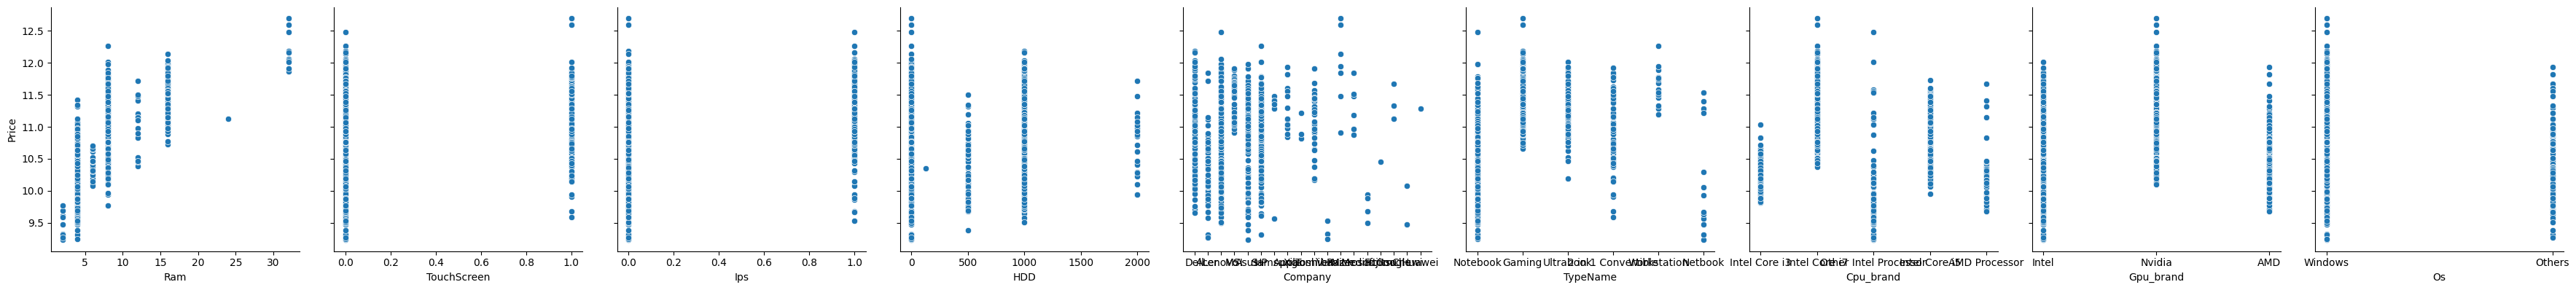

In [165]:
sns.pairplot(pd.concat([x_train, y_train], axis=1), height=4, y_vars="Price", x_vars=['Ram', 'TouchScreen', 'Ips', 'HDD', 'Company', 'TypeName',
       'Cpu_brand', 'Gpu_brand', 'Os'], kind="scatter")

## Normalidad

In [166]:

errors = (complete_pipeline.predict(x_train)-y_train).values

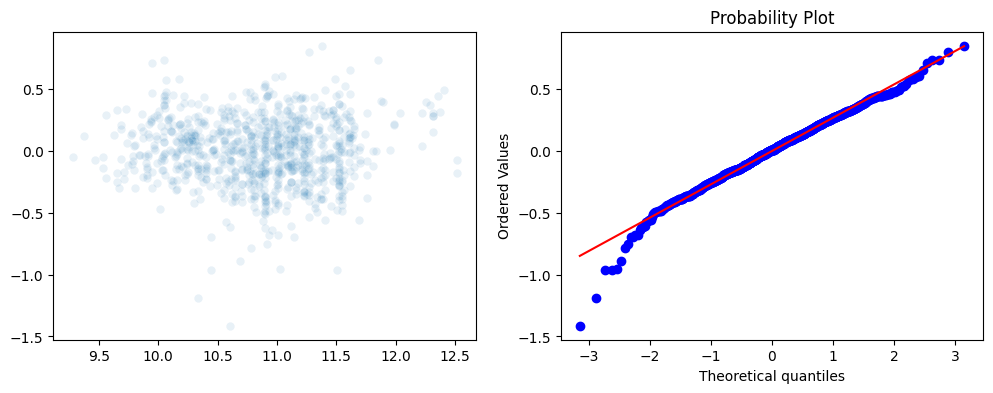

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=complete_pipeline.predict(x_train), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

## Homocedasticidad

<Axes: >

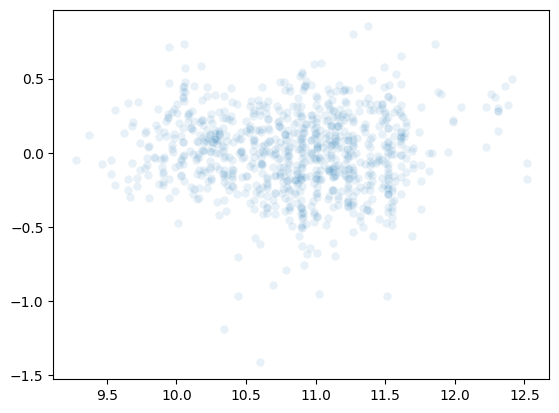

In [168]:
sns.scatterplot(x = complete_pipeline.predict(x_train), y=errors, alpha=0.1)

# Hiperplano de la regresion

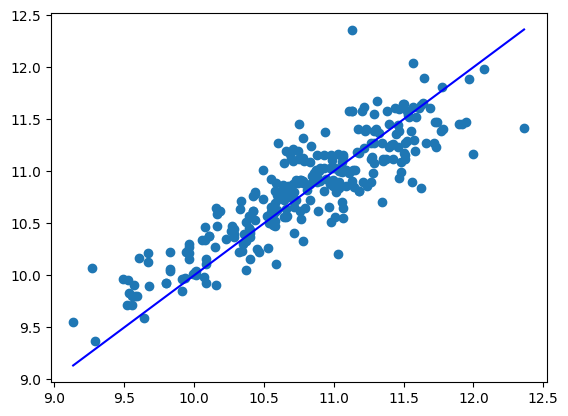

In [169]:
p1 = max(max(complete_pipeline.predict(x_test)),max(y_test))
p2 = min(min(complete_pipeline.predict(x_test)),min(y_test))
plt.plot([p1,p2],[p1,p2],"b-")
plt.scatter(y_test,complete_pipeline.predict(x_test))

#  Interpretación de los coeficientes

In [177]:
# Obtén los coeficientes del modelo
coef = complete_pipeline.named_steps['estimator'].coef_

# Obtén los nombres de las características categóricas después de la codificación
categorical_encoder = complete_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder']
categorical_feature_indices = preprocessing_pipeline.transformers_[1][1].get_feature_names_out(categoricas)

# Combina los nombres de las columnas numéricas y categóricas
column_names = numerical + list(categorical_feature_indices)

# Crea un DataFrame para mostrar las columnas y sus coeficientes
coef_df = pd.DataFrame({'Columna': column_names, 'Coeficiente': coef})

# Imprime el DataFrame con los coeficientes
coef_df

Columna  Coeficiente
0                               Ram     0.242985
1                       TouchScreen    -0.000957
2                               Ips     0.040491
3                               HDD    -0.062613
4                      Company_Acer    -0.147170
5                     Company_Apple     0.510035
6                      Company_Asus    -0.011611
7                     Company_Chuwi    -0.370976
8                      Company_Dell     0.058990
9                   Company_Fujitsu    -0.162164
10                   Company_Google     0.409106
11                       Company_HP     0.095364
12                   Company_Huawei     0.025922
13                   Company_Lenovo     0.005594
14                      Company_MSI     0.123378
15                 Company_Mediacom    -0.432655
16                Company_Microsoft     0.282205
17                    Company_Razer     0.236452
18                  Company_Samsung     0.072696
19                  Company_Toshiba     0.093501
20                     Company_Vero    -0.684043
21                   Company_Xiaomi    -0.104625
22      TypeName_2 in 1 Convertible     0.015718
23                  TypeName_Gaming    -0.005544
24                 TypeName_Netbook    -0.216164
25                TypeName_Notebook    -0.210584
26               TypeName_Ultrabook     0.049217
27             TypeName_Workstation     0.367356
28          Cpu_brand_AMD Processor    -0.128561
29          Cpu_brand_Intel Core i3    -0.087925
30          Cpu_brand_Intel Core i5     0.221010
31          Cpu_brand_Intel Core i7     0.329388
32  Cpu_brand_Other Intel Processor    -0.333912
33                    Gpu_brand_AMD    -0.061216
34                  Gpu_brand_Intel     0.020727
35                 Gpu_brand_Nvidia     0.040489
36                        Os_Others    -0.129319
37                       Os_Windows     0.129319

Podemos observar que en general las columnas que se eligieron si estan siendo acordes. Podemos darnos cuenta que RAM es una de las variables explicativas que mas influye en el modelo, junto con Company, por ejemplo, si Company es de Apple, sucede igual que en la realidad, sus precios son mayores a comparacion de los demas. 

# Persistencia Modelo

In [170]:
filename = "model.joblib"

In [171]:
dump(complete_pipeline, filename)

['model.joblib']

In [172]:
pipeline_loaded = load(filename)